# importing the Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# importing the data

In [2]:
#import ing the data
data_frame = pd.read_csv("Tumor.csv", names = ['class','age','sex',\
                                                               'histologic','degree-of-diff','bone',\
                                                               'bone-marrow','lung','plueral','peritoneum',\
                                                               'liver','brain','skin','neck','supraclavicular','axillar','mediastinum','abdominal'])

data_frame.head()

,class,age,sex,histologic,degree-of-diff,bone,bone-marrow,lung,plueral,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
0,1,1,1,?,3,2,2,1,2,2,2,2,2,2,2,2,2,2
1,1,1,1,?,3,2,2,2,2,2,1,2,2,2,1,2,1,2
2,1,1,2,2,3,1,2,2,2,2,2,2,2,2,2,2,1,2
3,1,1,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2
4,1,1,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2


# droping unwanted

In [3]:
data_frame = data_frame.drop(['degree-of-diff'], axis = 1)

# Replacing '?'

In [4]:
#Changing from string to integer
mode = data_frame.mode()
data_frame = data_frame.replace("?", mode)

# TypeCasting

In [5]:
for column in data_frame:
    if type(column)  == str:
        data_frame[column] = data_frame[column].astype(int)
    else:
        data_frame[column] = data_frame[column]

# Corr HeatMap

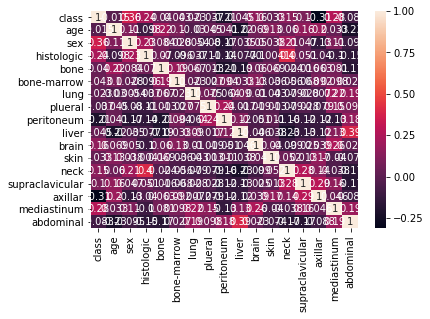

In [6]:
sns.heatmap(data_frame.corr(method='pearson'), annot = True)

# PairPlot of Data_Frame

In [7]:
#sns.pairplot(data_frame, hue = 'class')

In [8]:
#DESCRIBING THE DATA
data_frame.describe()

,class,age,sex,histologic,bone,bone-marrow,lung,plueral,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,8.678466,2.247788,1.525074,1.893805,1.722714,1.979351,1.778761,1.778761,1.719764,1.678466,1.938053,1.941003,1.870206,1.820059,1.902655,1.728614,1.660767
std,7.052624,0.568362,0.500109,0.377539,0.448321,0.142416,0.415695,0.415695,0.449778,0.467756,0.241415,0.235967,0.336573,0.384706,0.296865,0.445332,0.474149
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,7.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,14.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,22.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# Creating the Features and Labels

In [9]:
#Creating the features and the labels
X = data_frame.iloc[:, 0:].values
y = data_frame.iloc[:, 0].values

# TrainTestSplit

In [10]:
#TRAINING NAD TESTING THE DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Scaling

In [11]:
#preprocessing the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Dimention Reduction

In [12]:
"""from sklearn.decomposition import PCA
pc = PCA(n_components = 1)
X_train = pc.fit_transform(X_train)
X_test = pc.transform(X_test)
"""
pass

#WHEN I HAVE USED THIS DIMENTION REDUCTIONALITY THE DATA WAS LOSSING ITS CORRELATION BETWEEN THE COLOUMNS and it is
#lossing it's accuracy in between the data and incerasing in the error

# DecisionTree

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
Accu, Miss = [], []
ith,TAccu = [], []
Err, TErr = [], []
n = int(input("enter the number of the Best max_Depth:->>")) 
for i in range(1, n): #ITERATIONS OF THE DATA
    ith.append(i)
    classifier = DecisionTreeClassifier(max_depth = i)
    classifier.fit(X_train,y_train) #FITTING THE DATA
    y_pred = classifier.predict(X_test) #PREDICTING THE DATA
    Miss.append((y_test != y_pred).sum()) #FINDING MISSCLASSIIFCATION OF THE DATA
    Accu.append(accuracy_score(y_test,y_pred)) #APPENDING THE ACCURACY SCORE OF THE DATA
    TAccu.append(accuracy_score(y_train, classifier.predict(X_train)))#Training accuracy of the data
    error = 1 - (accuracy_score(y_test,y_pred)) #Erroe for the testing accuracy 
    Err.append(error) #Error
    terror = 1 - accuracy_score(y_train, classifier.predict(X_train)) #ERROR for training accuracy
    TErr.append(terror) #Training Error

enter the number of the Best max_Depth:->>15


In [14]:
ma = Accu.index(max(Accu)) #INDEX OF MAX ACCURACY VALUE
mis = Miss[ma] #MISSCLASSIFICATION OF THE INDEX OF THE DATA

In [15]:
print("Max_depth of the index:-", ma) #MAX DEPTH IN THE DECISION TREE OF THE DATA
print("Missclassifiction of the data:-",mis) #MISSCLASSIFICATION OF THE DATA
print("Accuracy of data:-", max(Accu))#BEST ACCURACY FOR THE DATA

Max_depth of the index:- 6
Missclassifiction of the data:- 0
Accuracy of data:- 1.0


In [16]:
print("============================Testing ACCURACIES=====================================================")
print("All accuracies of the data:-", Accu)
print("===========================MissClassification======================================================")
print("All Missclassifion of the data:-", Miss)
print("===========================Ith-Iteration===========================================================")
print("ith values :-", ith)
print("===========================Training Accuracy=======================================================")
print("Training Accuracy of the data:-", TAccu)
print("===========================Testing Error===========================================================")
print("Training Error of the data:-", Err)
print("===========================Training Error==========================================================")
print("Training Accuracy of the data:-", TErr)

============================Testing ACCURACIES=====================================================
All accuracies of the data:- [0.35294117647058826, 0.4264705882352941, 0.5735294117647058, 0.7941176470588235, 0.9264705882352942, 0.9558823529411765, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
===========================MissClassification======================================================
All Missclassifion of the data:- [44, 39, 29, 14, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0]
===========================Ith-Iteration===========================================================
ith values :- [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
===========================Training Accuracy=======================================================
Training Accuracy of the data:- [0.36531365313653136, 0.45387453874538747, 0.5940959409594095, 0.7675276752767528, 0.9003690036900369, 0.948339483394834, 0.988929889298893, 0.996309963099631, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
===========================Testing Error=====

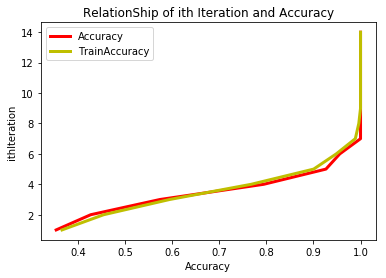

In [17]:
plt.plot(Accu, ith, c = 'r', lw = 3,label='Accuracy' )
plt.plot(TAccu, ith, c = 'y',lw = 3, label = "TrainAccuracy")
plt.title("RelationShip of ith Iteration and Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("ithIteration")
plt.legend()
plt.show()

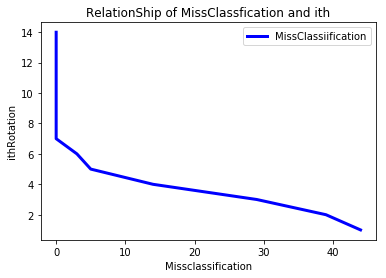

In [18]:
plt.plot(Miss, ith, c = 'b',lw = 3,label = 'MissClassiification')
plt.title("RelationShip of MissClassfication and ith")
plt.xlabel("Missclassification")
plt.ylabel("ithRotation")
plt.legend()
plt.show()

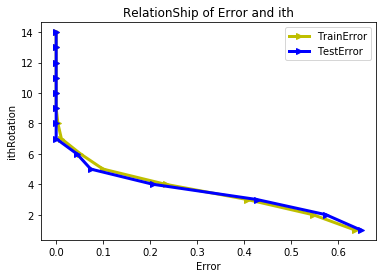

In [19]:
plt.plot(TErr, ith, c = 'y',lw = 3, label = "TrainError", marker = ">")
plt.plot(Err, ith, c = 'b',lw = 3, label = "TestError", marker = ">")
plt.title("RelationShip of Error and ith")
plt.xlabel("Error")
plt.ylabel("ithRotation")
plt.legend()
plt.show()

In [20]:
pass

"""
MaxDepth:--->>> when i'm max depth that the accuracy was decreasing 
Maxdepth = 3 #ACCU = 25
MAXdepth = 2 #Accuracy = 23
MaxDepth = 1 #Accuracy =  23
MaxDepth = None #Accuracy = 53

This all are using with the Criterion = Entropy
#Acuuracy for the Default data 
***MaxDepth = None
***Criterion = gini
***Accuracy = 0.98****
This is the best accuracy for the data
"""

pass

# MissClassification

In [21]:
print("Miss classification of the data", mis)

Miss classification of the data 0


# Heatmap

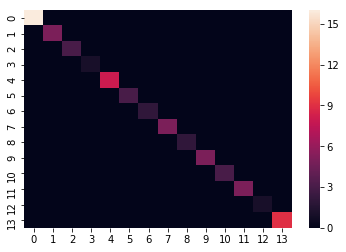

In [22]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix( y_test, y_pred,))